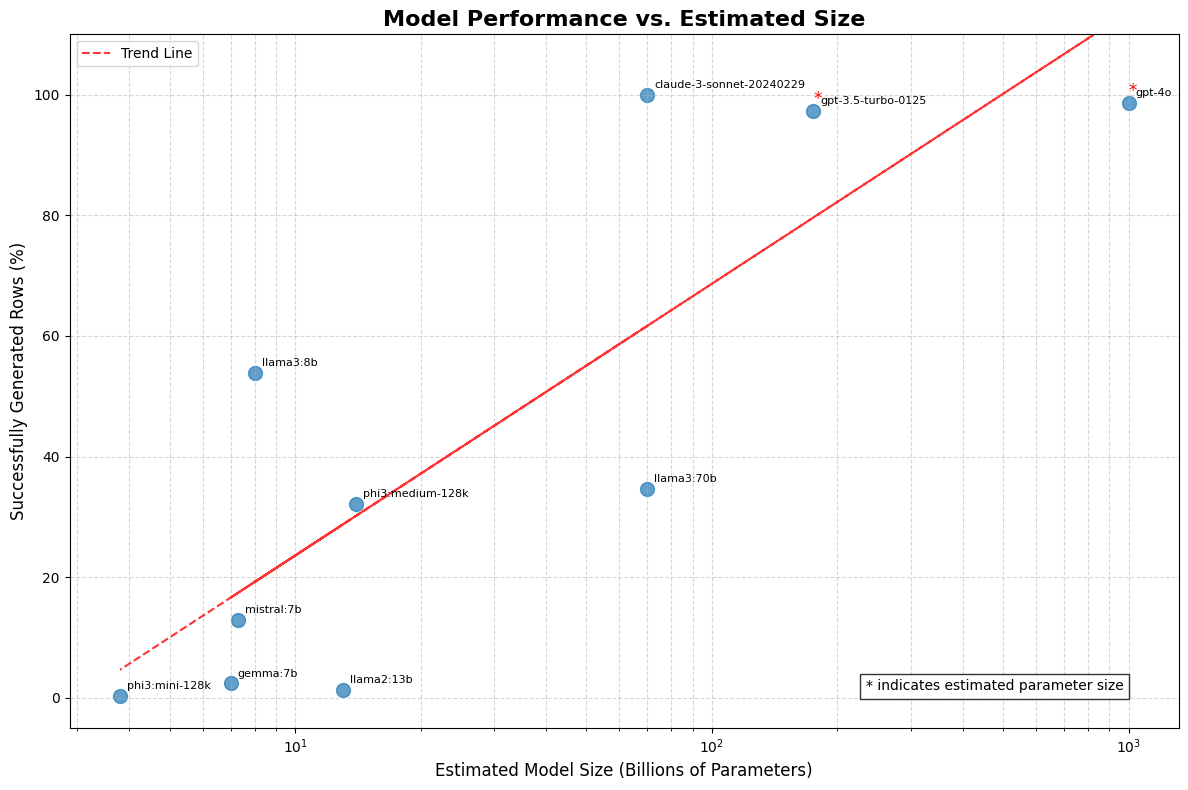

Figure saved as 'model_performance_vs_size.png'


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Model sizes in billions of parameters (approximations based on available information)
model_sizes = {
    "claude-3-5-sonnet-20240620": 70,   # https://lifearchitect.substack.com/p/the-memo-special-edition-claude-3
    "claude-3-sonnet-20240229": 70,     # https://lifearchitect.substack.com/p/the-memo-special-edition-claude-3
    "gemma:7b": 7,                      # https://huggingface.co/google/gemma-7b
    "gpt-3.5-turbo-0125": 175,          # https://lifearchitect.ai/chatgpt/ (Estimated)
    "gpt-4o": 1000,                     # https://gettalkative.com/info/gpt-4-vs-gpt-3-5 (Estimated)
    "llama2:13b": 13,                   # https://huggingface.co/meta-llama/Llama-2-13b
    "llama3:8b": 8,                     # https://huggingface.co/meta-llama/Meta-Llama-3-70B
    "llama3:70b": 70,                   # https://huggingface.co/meta-llama/Meta-Llama-3-70B
    "mistral:7b": 7.3,                  # https://mistral.ai/news/announcing-mistral-7b/
    "mixtral:8x22b": 141,               # https://mistral.ai/news/mixtral-8x22b/
    "phi3:medium-128k": 14,             # https://huggingface.co/microsoft/Phi-3-medium-128k-instruct
    "phi3:mini-128k": 3.8,              # https://huggingface.co/microsoft/Phi-3-mini-128k-instruct
}

# Data from the provided results
model_names = [
    "claude-3-sonnet-20240229", "gpt-4o", "gpt-3.5-turbo-0125", "llama3:8b",
    "llama3:70b", "phi3:medium-128k", "mistral:7b", "gemma:7b", "llama2:13b", "phi3:mini-128k"
]
success_rates = [
    1.000000, 0.986667, 0.973333, 0.538667, 0.346667, 0.321333,
    0.129333, 0.024000, 0.013333, 0.002667
]

# Create lists for plotting
x = [model_sizes[name] for name in model_names]
y = [rate * 100 for rate in success_rates]  # Convert to percentage

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(x, y, s=100, alpha=0.7)

# Add labels for each point
for i, name in enumerate(model_names):
    plt.annotate(name, (x[i], y[i]), xytext=(5, 5), textcoords='offset points', fontsize=8)

# Set log scale for x-axis
plt.xscale('log')

# Customize the plot
plt.title("Model Performance vs. Estimated Size", fontsize=16, fontweight='bold')
plt.xlabel("Estimated Model Size (Billions of Parameters)", fontsize=12)
plt.ylabel("Successfully Generated Rows (%)", fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.ylim([-5,110])

# Add a trend line
z = np.polyfit(np.log10(x), y, 1)
p = np.poly1d(z)
plt.plot(x, p(np.log10(x)), "r--", alpha=0.8, label="Trend Line")

# Highlight the estimated models
for i, name in enumerate(model_names):
    if name in ["gpt-3.5-turbo-0125", "gpt-4o"]:
        plt.annotate("*", (x[i], y[i]), xytext=(0, 5), textcoords='offset points', fontsize=12, color='red')

# Add a footnote box
plt.text(0.95, 0.05, '* indicates estimated parameter size', 
         verticalalignment='bottom', horizontalalignment='right',
         transform=plt.gca().transAxes,
         color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig("./images/model_performance_vs_parameter_size.png", dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved as 'model_performance_vs_size.png'")


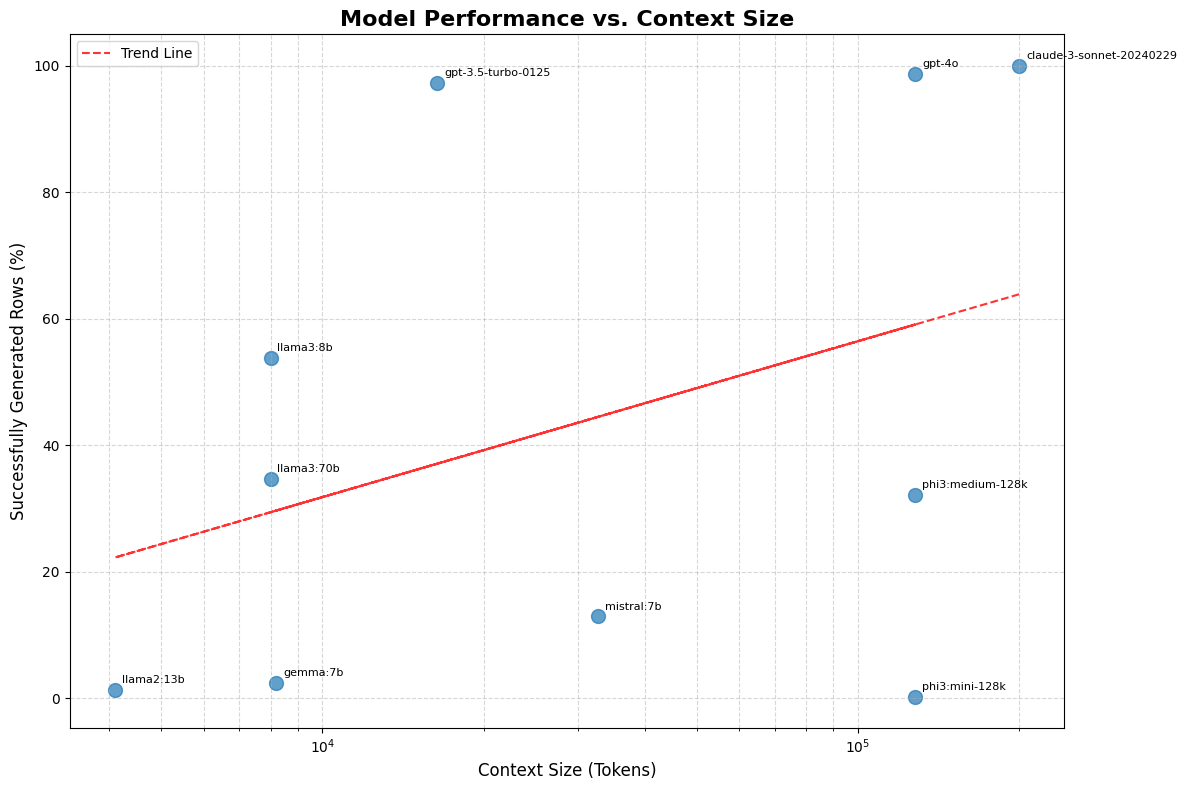

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Context window lengths (in tokens)
context_lengths = {
    "claude-3-5-sonnet-20240620": 200000,   # https://docs.anthropic.com/en/docs/about-claude/models
    "claude-3-sonnet-20240229": 200000,     # https://docs.anthropic.com/en/docs/about-claude/models
    "gpt-4o": 128000,                       # https://platform.openai.com/docs/models/gpt-4o
    "gpt-3.5-turbo-0125": 16385,            # https://platform.openai.com/docs/models/gpt-3-5-turbo
    "llama2:13b": 4096,                     # https://huggingface.co/meta-llama/Llama-2-13b
    "llama3:8b": 8000,                      # https://huggingface.co/meta-llama/Meta-Llama-3-8B
    "llama3:70b": 8000,                     # https://huggingface.co/meta-llama/Meta-Llama-3-8B
    "phi3:medium-128k": 128000,             # https://huggingface.co/microsoft/Phi-3-medium-128k-instruct
    "phi3:mini-128k": 128000,               # https://huggingface.co/microsoft/phi-3-mini
    "mistral:7b": 32768,                    # https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.2
    "gemma:7b": 8192,                       # https://huggingface.co/google/gemma-7b
}

# Data from the provided results
model_names = [
    "claude-3-sonnet-20240229", "gpt-4o", "gpt-3.5-turbo-0125", "llama3:8b",
    "llama3:70b", "phi3:medium-128k", "mistral:7b", "gemma:7b", "llama2:13b", "phi3:mini-128k"
]
success_rates = [
    1.000000, 0.986667, 0.973333, 0.538667, 0.346667, 0.321333,
    0.129333, 0.024000, 0.013333, 0.002667
]

# Create lists for plotting
x = [context_lengths[name] for name in model_names]
y = [rate * 100 for rate in success_rates]  # Convert to percentage

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(x, y, s=100, alpha=0.7)

# Add labels for each point
for i, name in enumerate(model_names):
    plt.annotate(name, (x[i], y[i]), xytext=(5, 5), textcoords='offset points', fontsize=8)

# Set log scale for x-axis
plt.xscale('log')

# Customize the plot
plt.title("Model Performance vs. Context Size", fontsize=16, fontweight='bold')
plt.xlabel("Context Size (Tokens)", fontsize=12)
plt.ylabel("Successfully Generated Rows (%)", fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.5)

# Add a trend line
z = np.polyfit(np.log10(x), y, 1)
p = np.poly1d(z)
plt.plot(x, p(np.log10(x)), "r--", alpha=0.8, label="Trend Line")

plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig("./images/model_performance_vs_context_length.png", dpi=300, bbox_inches='tight')
plt.show()
